In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score



## Staring reading data into pandas

In [65]:
#https://archive.ics.uci.edu/ml/datasets/Adult
 
raw_data= pd.read_csv("adult.data",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])
raw_data2= pd.read_csv("adult.data",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])
print(raw_data.shape)

raw_data=pd.concat([raw_data,pd.get_dummies(raw_data['sex'], prefix='sex'),pd.get_dummies(raw_data['workclass'], prefix='workclass'),pd.get_dummies(raw_data['education'], prefix='education'),pd.get_dummies(raw_data['marital-status'], prefix='marital-status'),pd.get_dummies(raw_data['occupation'], prefix='occupation'),pd.get_dummies(raw_data['relationship'], prefix='relationship'),pd.get_dummies(raw_data['race'], prefix='race'),pd.get_dummies(raw_data['native-country'], prefix='native-country'),pd.get_dummies(raw_data['income'], prefix='income')],axis=1)
raw_data.drop(['sex','workclass','education','marital-status','native-country','race','relationship','occupation','income_ <=50K','income'],axis=1, inplace=True)
train, test= train_test_split(raw_data,test_size=1/3)
#train data
X_train = train.drop(['income_ >50K'],axis=1)
y_train= train['income_ >50K']
#test data
X_test = test.drop(['income_ >50K'],axis=1)
y_test= test['income_ >50K']
pd.set_option('display.max_columns', None)
#print(raw_data)



(32561, 15)


# Checkign for Imbalance 

imalance 
 0    24720
1     7841
Name: income_ >50K, dtype: int64
nullcount 0


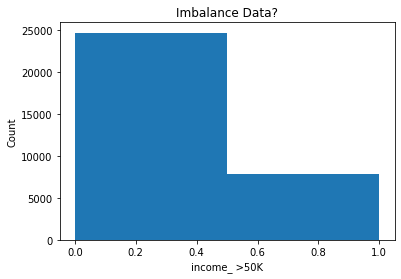

In [32]:
# checkign for imbalance 
print('imalance \n',raw_data['income_ >50K'].value_counts())
# so this mean the data is imbalacned since there is less data from poeple with income higher than 50k than lower thank 50k
print('nullcount',raw_data.isnull().sum().sum())

plt.hist(raw_data['income_ >50K'], bins = 2)

plt.xlabel('income_ >50K')
plt.ylabel('Count')
plt.title('Imbalance Data?')
plt.show()

# EDA Start - (min, man,and mean on data), Box Plots, Corr Max(num only and all features)

In [4]:
#EDA start
pd.set_option('display.max_columns', None)
raw_data.describe(include='all')
# capital gain and loss have high outliners let remove those 


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_ Female,sex_ Male,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native-country_ ?,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.0000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.330795,0.669205,0.0

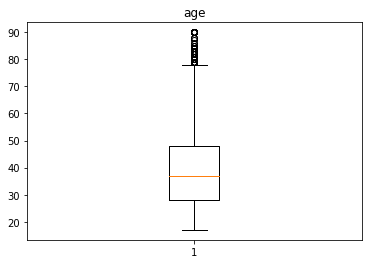

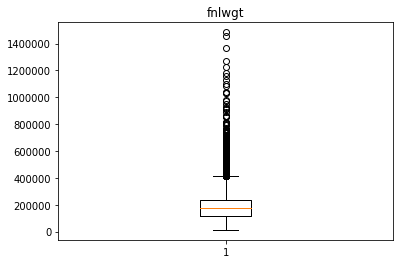

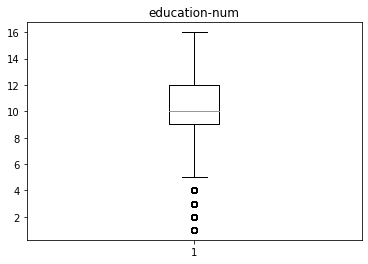

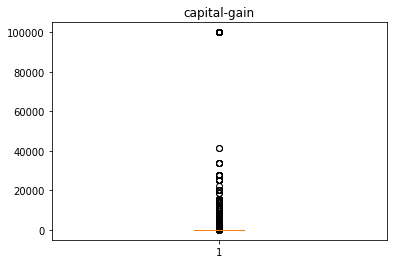

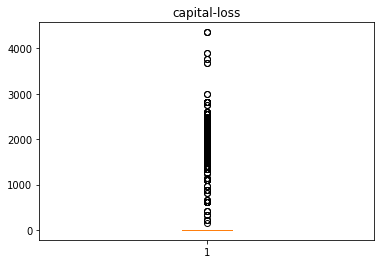

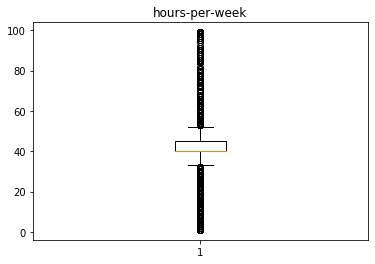

In [33]:
#box plot for each non catigorical data
bpdata=raw_data2.copy()
bpdata.drop(['sex','workclass','education','marital-status','native-country','race','relationship','occupation','income'],axis=1, inplace=True)
for i in bpdata.columns:
    plt.boxplot(bpdata[i])
    plt.title(i)
    plt.show()

i see some bid outliers in captial loss and gain so i will be removing those

In [62]:
# dropping outliners
for i in range(3):
    raw_data.drop(raw_data['capital-gain'].idxmax(),inplace =True)
for i in range(4):
    raw_data.drop(raw_data['capital-loss'].idxmax(),inplace =True)

print(raw_data.shape)
train, test= train_test_split(raw_data,test_size=1/3)
#train data
X_train = train.drop(['income_ >50K'],axis=1)
y_train= train['income_ >50K']
#test data
X_test = test.drop(['income_ >50K'],axis=1)
y_test= test['income_ >50K']


(32547, 109)


# corr mat for only numical vals 

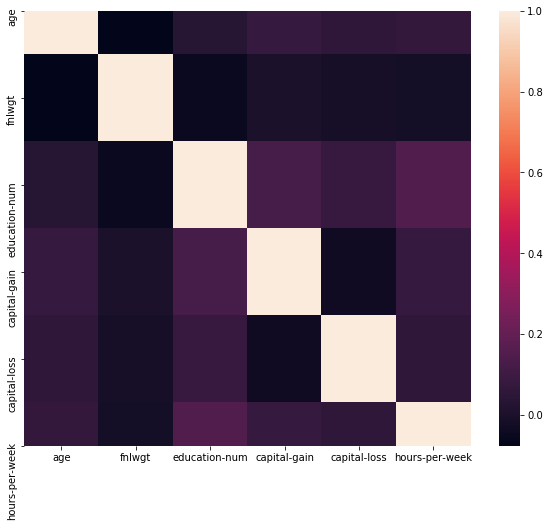

In [7]:
# cor mat for only numical vals 
cor_mat = raw_data2.corr()
pd.set_option('display.max_rows', cor_mat.shape[0]+1)
#print(cor_mat)
ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cor_mat,
            xticklabels=cor_mat.columns.values,
            yticklabels=cor_mat.columns.values)


# corr mat for all varibles 

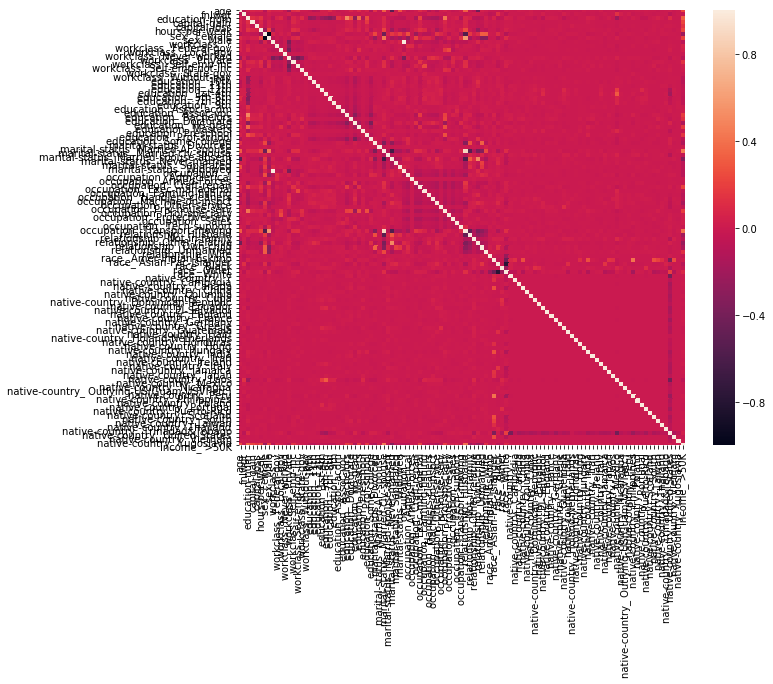

In [8]:
# cor matrix for all 
cor_mat = raw_data.corr()
pd.set_option('display.max_rows', cor_mat.shape[0]+1)
#print(cor_mat)
ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cor_mat,
            xticklabels=cor_mat.columns.values,
            yticklabels=cor_mat.columns.values)

corr results -

near 1 corr 

    occupation_ Transport-moving and workclass_ ?
    occupation_ Transport-moving and marital-status_ Married-civ-spouse
    
near 0.4

    corrilation between edcuation level and education num, as well as race and country of origin specififly for asain race 
    more with native-country_ Laos and low education level
    
near -1 

    race is also negtiely corr with other race as well as sex
    
#in  light of this we will use a decisiontion tree with boosting that will take of this since, the dection tree we end up picking one or the other when varibbles are corr 


# model testing(svc,sgd,knn,random forrest,GradientBoosting,GradientBoostingClassifier )

In [34]:
# starting model testing 
# try linear svc 
linearsvc = LinearSVC(random_state=0, tol=1e-5)
linearsvc.fit(X_train, y_train)

print("linearsvc",linearsvc.score(X_test,y_test))

linearsvc 0.2837663534180947


/Users/jordansmart/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# try svc 
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("svc",svc.score(X_test,y_test))

In [43]:
#sgd classfier, since we ave quite a bit of sample i thought we give it a shot but it typically need more than 100k samples 
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
print("svc",sgd.score(X_test,y_test))

svc 0.23954302561267735


In [6]:
# try KNN classifier 
kneighbors3d = KNeighborsClassifier(n_neighbors=3,weights = 'distance')
kneighbors3d.fit(X_train, y_train)
print("kneighbors3d",kneighbors3d.score(X_test,y_test))
kneighbors3 = KNeighborsClassifier(n_neighbors=3)
kneighbors3.fit(X_train, y_train)
print("kneighbors3",kneighbors3.score(X_test,y_test))
kneighbors4 = KNeighborsClassifier(n_neighbors=4)
kneighbors4.fit(X_train, y_train)
print("kneighbors4",kneighbors4.score(X_test,y_test))
kneighbors5 = KNeighborsClassifier(n_neighbors=5)
kneighbors5.fit(X_train, y_train)
print("kneighbors5",kneighbors5.score(X_test,y_test))

kneighbors3d 0.7546526626128616
kneighbors3 0.7592592592592593
kneighbors4 0.7881886861986365
kneighbors5 0.7750138197899392


In [69]:
# try random forrest - eesmble 
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("rfc",rfc.score(X_test,y_test))

rfc 0.8518108930052529


In [58]:
#try GradientBoosting 
grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
print("grb",grb.score(X_test,y_test))
print(f1_score(grb.predict(X_test),y_test))

grb 0.8626059712495393
0.6685930206712603


In [70]:
# try adaboost 
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
print("ada",ada.score(X_test,y_test))


ada 0.8533775688876601


# since we have some imbalance in the data we will be using F1 score, the scores above were just to get a base line

# Hyper-parameter tuning start

In [37]:
# could not add labels to graph since had to restart kernel after hyper parm tunning and it took 10+ hours 

In [78]:
# tunning hyper n-inter
n= range(0,500,20)
adan = []
rfcn=[]
grbn=[]
for i in n:
    if i == 0: continue
    print(i)
    ada = AdaBoostClassifier(n_estimators= i)
    ada.fit(X_train, y_train)
    f1_score(ada.predict(X_test),y_test)
    print("ada",f1_score(ada.predict(X_test),y_test))
    adan.append(f1_score(ada.predict(X_test),y_test))
    rfc = RandomForestClassifier(n_estimators= i)
    rfc.fit(X_train, y_train)
    print("rfc",f1_score(rfc.predict(X_test),y_test))
    rfcn.append(f1_score(rfc.predict(X_test),y_test))
    grb = GradientBoostingClassifier(n_estimators= i)
    grb.fit(X_train, y_train)
    print("grb",f1_score(grb.predict(X_test),y_test))
    grbn.append(f1_score(grb.predict(X_test),y_test))
    


    

20
ada 0.6546746613368865
rfc 0.6516072980017376
grb 0.6156090444930709
40
ada 0.6706401766004415
rfc 0.6659533490263214
grb 0.6426198386331277
60
ada 0.6814489571899012
rfc 0.6658092175777064
grb 0.6584686774941996
80
ada 0.6824561403508772
rfc 0.6699381267335183
grb 0.6723150904511106
100
ada 0.6865540688747532
rfc 0.6689610668961067
grb 0.6819107991849671
120
ada 0.6958796599084369
rfc 0.6653854366858851
grb 0.6905347952562094
140
ada 0.6985022791404384
rfc 0.6676570458404074
grb 0.6943328871039715
160
ada 0.7001081081081081
rfc 0.6620955646025284
grb 0.702089817696754
180
ada 0.7032871972318339
rfc 0.6696581196581196
grb 0.7014428412874583
200
ada 0.7015184381778742
rfc 0.6696562032884903
grb 0.7049180327868851
220
ada 0.7045601901880268
rfc 0.6659556313993175
grb 0.7065073041168658
240
ada 0.7058315334773217
rfc 0.6702263989747971
grb 0.7080388692579503
260
ada 0.7066436583261434
rfc 0.6679438058748405
grb 0.7076990955217296
280
ada 0.7091222030981067
rfc 0.6687993175517167
grb 0.

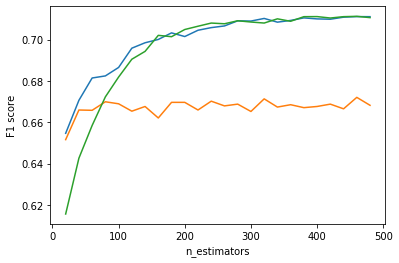

In [87]:
n= range(20,500,20)
plt.plot(n,adan,label='ada')
plt.plot(n,rfcn,label='random')
plt.plot(n,grbn)
plt.ylabel('F1 score')
plt.xlabel('n_estimators')
plt.show()
# best grb 0.7112952464020933 n=460460 

In [88]:
# tuning learning rate, setting n estimator to 460 from tuned before 
l= np.arange(.05, 1, 0.05)
adal = []

grbl=[]
for i in l:
    
    print(i)
    ada = AdaBoostClassifier(n_estimators = 460,learning_rate= i)
    ada.fit(X_train, y_train)
    f1_score(ada.predict(X_test),y_test)
    print("ada",f1_score(ada.predict(X_test),y_test))
    adal.append(f1_score(ada.predict(X_test),y_test))
    
    grb = GradientBoostingClassifier(n_estimators = 460,learning_rate= i)
    grb.fit(X_train, y_train)
    print("grb",f1_score(grb.predict(X_test),y_test))
    grbl.append(f1_score(grb.predict(X_test),y_test))

0.05
ada 0.653342522398346
grb 0.7028937486193948
0.1
ada 0.6654627539503385
grb 0.711140178766078
0.15000000000000002
ada 0.6735287536361603
grb 0.7077655202249621
0.2
ada 0.6774193548387096
grb 0.7108148785207482
0.25
ada 0.6834372217275156
grb 0.7064102564102563
0.3
ada 0.6859173700577522
grb 0.6995305164319249
0.35000000000000003
ada 0.6905551869055518
grb 0.7007454739084131
0.4
ada 0.6935626102292768
grb 0.6918531025749262
0.45
ada 0.6983917162370565
grb 0.7013859722805544
0.5
ada 0.7016465422612513
grb 0.6957446808510638
0.55
ada 0.7011847301448003
grb 0.6935281837160752
0.6000000000000001
ada 0.7052907739396589
grb 0.6941422594142259
0.6500000000000001
ada 0.7045206376938196
grb 0.69163179916318
0.7000000000000001
ada 0.7050328227571115
grb 0.6872393661384487
0.7500000000000001
ada 0.7074235807860263
grb 0.6830985915492958
0.8
ada 0.7089763094979351
grb 0.6805584496770161
0.8500000000000001
ada 0.7106179286335944
grb 0.677559462254395
0.9000000000000001
ada 0.7082066869300911
gr

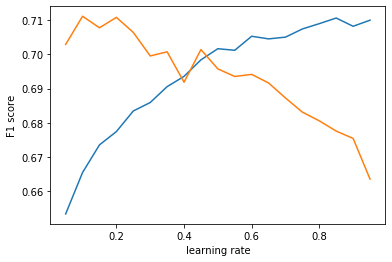

In [91]:
#did not improve past default
plt.plot(l,adal,label='ada')

plt.plot(l,grbl,label='grad')
plt.ylabel('F1 score')
plt.xlabel('learning rate')
plt.show()

In [92]:
ms= range(2,500,10)

rfcms=[]
grbms=[]
for i in ms:
    
    print(i)
    
    rfc = RandomForestClassifier(n_estimators = 460,min_samples_split= i)
    rfc.fit(X_train, y_train)
    print("rfc",f1_score(rfc.predict(X_test),y_test))
    rfcms.append(f1_score(rfc.predict(X_test),y_test))
    
    grb = GradientBoostingClassifier(n_estimators = 460,min_samples_split= i)
    grb.fit(X_train, y_train)
    print("grb",f1_score(grb.predict(X_test),y_test))
    grbms.append(f1_score(grb.predict(X_test),y_test))

2
rfc 0.6668084201573463
grb 0.7114210985178727
12
rfc 0.6816889083351565
grb 0.7112078346028291
22
rfc 0.6863046823477689
grb 0.7127335940895263
32
rfc 0.6890498134737767
grb 0.7110722865254422
42
rfc 0.6880389122263985
grb 0.7116724738675958
52
rfc 0.6814551907719609
grb 0.7105779716466739
62
rfc 0.6827647319450598
grb 0.708888403581568
72
rfc 0.6794300979519146
grb 0.7124538143881763
82
rfc 0.6778673835125448
grb 0.7117979973878972
92
rfc 0.6778673835125448
grb 0.7112078346028291
102
rfc 0.675219446320054
grb 0.711120764552563
112
rfc 0.674470959027465
grb 0.7117685447030673
122
rfc 0.6759487985627667
grb 0.7108695652173912
132
rfc 0.6745133544590313
grb 0.7137886037407567
142
rfc 0.6720977596741344
grb 0.7146898803046792
152
rfc 0.6719385449615907
grb 0.712858384013901
162
rfc 0.6672723143311378
grb 0.7119529719137817
172
rfc 0.6719564724552256
grb 0.7118938899760818
182
rfc 0.6698305084745764
grb 0.7139756944444444
192
rfc 0.6681807858278447
grb 0.7096774193548387
202
rfc 0.668175

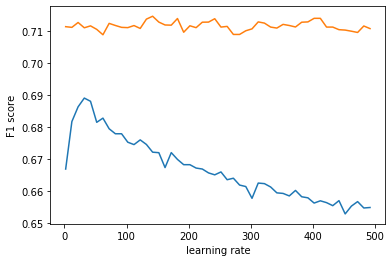

In [99]:
#did not improve past default
plt.plot(ms,rfcms,label='random')

plt.plot(ms,grbms,label='grad')
plt.ylabel('F1 score')
plt.xlabel('min_samples_split')
plt.show()

In [95]:
ml= range(2,50,1) # best 182 .7139

rfcml=[]
grbml=[]
for i in ml:
    
    print(i)
    
    rfc = RandomForestClassifier(n_estimators = 460,min_samples_leaf= i)
    rfc.fit(X_train, y_train)
    print("rfc",f1_score(rfc.predict(X_test),y_test))
    rfcml.append(f1_score(rfc.predict(X_test),y_test))
    
    grb = GradientBoostingClassifier(n_estimators = 460,min_samples_leaf= i)
    grb.fit(X_train, y_train)
    print("grb",f1_score(grb.predict(X_test),y_test))
    grbml.append(f1_score(grb.predict(X_test),y_test))

2
rfc 0.6846408839779006
grb 0.7103658536585366
3
rfc 0.6826880284824209
grb 0.7144408251900108
4
rfc 0.6786194531600178
grb 0.7138810198300283
5
rfc 0.6753246753246754
grb 0.7138797814207651
6
rfc 0.6738592942234211
grb 0.71509351892127
7
rfc 0.6705644254553632
grb 0.7130054644808743
8
rfc 0.6686203787195673
grb 0.7153762268266086
9
rfc 0.6671186440677966
grb 0.7151884942253214
10
rfc 0.6660612939841091
grb 0.7110820814282605
11
rfc 0.6648488979777324
grb 0.7146272549445772
12
rfc 0.6624058434147454
grb 0.7153729071537291
13
rfc 0.6636363636363636
grb 0.7144101001306051
14
rfc 0.6602608098833219
grb 0.7146898803046792
15
rfc 0.6573137074517019
grb 0.7133536320139191
16
rfc 0.6573394495412844
grb 0.7112369337979094
17
rfc 0.6560073092736409
grb 0.7142235754675946
18
rfc 0.655632183908046
grb 0.71026814911707
19
rfc 0.6545871559633027
grb 0.7137886037407567
20
rfc 0.6541970802919708
grb 0.7098039215686275
21
rfc 0.6505636070853463
grb 0.714161220043573
22
rfc 0.6439972241498958
grb 0.71

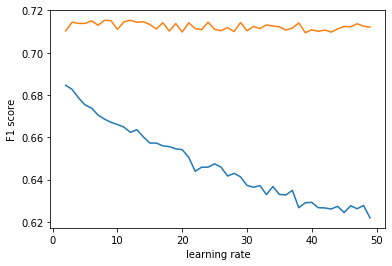

In [101]:
#did not improve past default
plt.plot(ml,rfcml, label='random')

plt.plot(ml,grbml, label='grad')
plt.ylabel('F1 score')
plt.xlabel('min_samples_leaf')
plt.show()

In [104]:
md= range(2,500,3)

rfcmd=[]
grbmd=[]
for i in md:
    
    print(i)
    
    rfc = RandomForestClassifier(n_estimators = 460,max_depth= i,min_samples_leaf= 8)
    rfc.fit(X_train, y_train)
    print("rfc",f1_score(rfc.predict(X_test),y_test))
    rfcmd.append(f1_score(rfc.predict(X_test),y_test))
    
    grb = GradientBoostingClassifier(n_estimators = 460,max_depth= i,min_samples_leaf= 8)
    grb.fit(X_train, y_train)
    print("grb",f1_score(grb.predict(X_test),y_test))
    grbmd.append(f1_score(grb.predict(X_test),y_test))

2
rfc 0.07046070460704608
grb 0.7018165706690297
5
rfc 0.5516332982086407
grb 0.7084048027444253
8
rfc 0.6229191797346201


KeyboardInterrupt: 

# final model with 0.7177656446871062 f1 score and acc befroe feature slection

In [67]:
# final model with 0.7177656446871062 f1 score and acc befroe feature slection
train, test= train_test_split(raw_data,test_size=1/3)
#train data
X_train = train.drop(['income_ >50K'],axis=1)
y_train= train['income_ >50K']
#test data
X_test = test.drop(['income_ >50K'],axis=1)
y_test= test['income_ >50K']

scores=[]
grb = GradientBoostingClassifier(n_estimators = 460,min_samples_leaf= 8)
grb.fit(X_train, y_train)
scores.append(f1_score(grb.predict(X_test),y_test))
print("grb f1-score",f1_score(grb.predict(X_test),y_test))
print("grb acc",grb.score(X_test,y_test))
# final model


grb f1-score 0.7168874172185431
grb acc 0.8739635157545605


In [64]:
# leanring rate 0.85
ada = AdaBoostClassifier(n_estimators = 460,learning_rate= 0.8500000000000001)
ada.fit(X_train, y_train)
f1_score(ada.predict(X_test),y_test)
print("ada",f1_score(ada.predict(X_test),y_test))
scores.append(f1_score(ada.predict(X_test),y_test))
#min sample spilt  42
rfc = RandomForestClassifier(n_estimators = 460,min_samples_split= 42)
rfc.fit(X_train, y_train)
print("rfc",f1_score(rfc.predict(X_test),y_test))

scores.append(f1_score(rfc.predict(X_test),y_test))



ada 0.7009461127108186
rfc 0.6873949579831933


# graph showing tuned models

[0.7085500312044934, 0.6942114093959731, 0.6784875026703696]


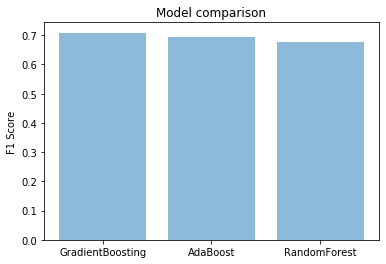

In [61]:
scorenames=('GradientBoosting', 'AdaBoost', 'RandomForest')
y_pos = np.arange(len(scorenames))
print(scores)

plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, scorenames)
plt.ylabel('F1 Score')
plt.title('Model comparison')

plt.show()

# feature importance

In [ ]:
importances = grb.feature_importances_
#print(importances)
imports=[]
for i in range(len(importances)):
    imports.append((raw_data.columns[i],grb.feature_importances_[i]))
    
#print(imports)

In [44]:
imports.sort(key=lambda x:x[1],reverse = True)
print(imports)
#raw_data

[('marital-status_ Married-civ-spouse', 0.343518230168718), ('capital-gain', 0.19894706212328658), ('education-num', 0.1865960991133202), ('age', 0.06885758030000448), ('capital-loss', 0.059943429031225216), ('hours-per-week', 0.0424041012223662), ('fnlwgt', 0.020000869347142715), ('occupation_ Exec-managerial', 0.015779064616595378), ('occupation_ Prof-specialty', 0.00904769007593648), ('relationship_ Wife', 0.005522442478614197), ('workclass_ Self-emp-not-inc', 0.004625461387045359), ('occupation_ Farming-fishing', 0.004308259767933055), ('occupation_ Other-service', 0.0038499480203741223), ('relationship_ Husband', 0.0023835350145780657), ('workclass_ Local-gov', 0.002100223316552027), ('sex_ Female', 0.002015748059363145), ('occupation_ Tech-support', 0.0015306095360571811), ('workclass_ Federal-gov', 0.0014927855695433786), ('occupation_ Protective-serv', 0.001462485483788417), ('marital-status_ Married-AF-spouse', 0.001457987677039972), ('workclass_ Self-emp-inc', 0.0014552399081

In [45]:
col=[]
for a,b in imports:
    col.append(a)
colscores=[]
for i in range(1,len(imports)):
    data=raw_data.copy()
    c=col[:10]
    c.append('income_ >50K')
    train, test= train_test_split(data[c],test_size=1/3)
    #train data
    X_train = train.drop(['income_ >50K'],axis=1)
    y_train= train['income_ >50K']
    #test data
    X_test = test.drop(['income_ >50K'],axis=1)
    y_test= test['income_ >50K']
    grb = GradientBoostingClassifier(n_estimators = 460,min_samples_leaf= 8)
    grb.fit(X_train, y_train)

    print("grb f1-score",f1_score(grb.predict(X_test),y_test))
    print("grb acc",grb.score(X_test,y_test))
    
    
    

grb f1-score 0.6947816826411075
grb acc 0.8679506081828234
grb f1-score 0.6834516892618895
grb acc 0.8644489495023959
grb f1-score 0.682472480948349
grb acc 0.8617766310357537
grb f1-score 0.7066219614417434
grb acc 0.8709915223000368
grb f1-score 0.6823679185232336
grb acc 0.8620530777736822
grb f1-score 0.7045075125208681
grb acc 0.8695171396977516
grb f1-score 0.6869546712066397
grb acc 0.8644489495023959
grb f1-score 0.6939471440750213
grb acc 0.867674161444895
grb f1-score 0.6937829293993678
grb acc 0.8661076299299668
grb f1-score 0.6939216958684836
grb acc 0.8696092886103944
grb f1-score 0.7009287925696595
grb acc 0.8664762255805382
grb f1-score 0.6782273603082851
grb acc 0.8615001842978253
grb f1-score 0.6847228099873043
grb acc 0.8626981201621821
grb f1-score 0.6991427974074849
grb acc 0.8673977147069665
grb f1-score 0.691151919866444
grb acc 0.8636196092886104
grb f1-score 0.6838655106787904
grb acc 0.862237375598968
grb f1-score 0.7040498442367602
grb acc 0.8686877994839661
g